<a href="https://colab.research.google.com/github/vatsalmehta163/codsoft1/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Preprocessing the data by removing unwanted features

In [ ]:
df.drop(columns=['Surname', 'RowNumber', 'CustomerId'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns = ['Geography','Gender'], drop_first = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

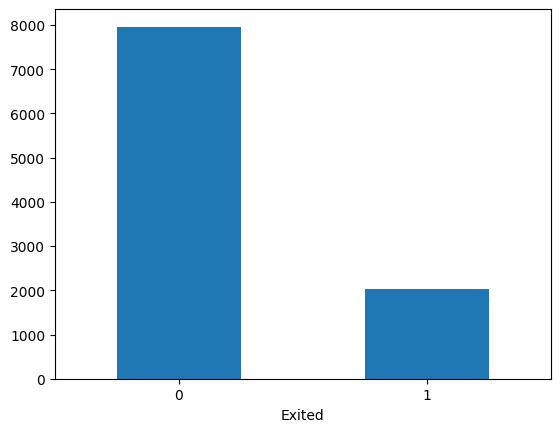

In [ ]:
df["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

Since the number of class in class 1 is less ,this might lead to biased prediction hence we normalizer it

In [ ]:
not_Exited = df[df["Exited"] == 0]
Exited = df[df["Exited"] == 1]

print(not_Exited.shape[0])
print(Exited.shape[0])

7963
2037


In [ ]:
not_Exited = not_Exited.sample(Exited.shape[0], random_state=42)

df_new = pd.concat([not_Exited , Exited])

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

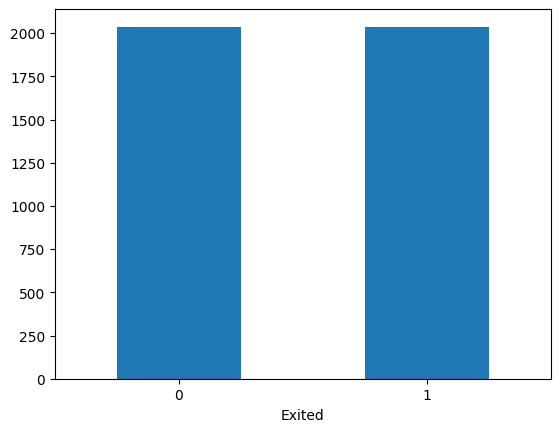

In [ ]:
df_new["Exited"].value_counts().plot(kind = "bar")
plt.xticks(rotation=0)

In [ ]:
X = df_new.drop(columns = "Exited" , axis = 1)
y = df_new["Exited"]

In [ ]:
from sklearn.preprocessing import StandardScaler
columns = df_new.columns.tolist()
columns.remove('Exited')

scaler = StandardScaler()

X[columns] = scaler.fit_transform(X[columns])
df_new[X.columns] = X
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8165,-0.437660,-0.391494,1.045749,1.187445,0.724545,0.643500,-0.925679,-0.208295,0,-0.663389,1.841219,0.977187
6409,0.350901,-0.766775,1.392065,-1.343806,0.724545,0.643500,1.080288,-1.080888,0,-0.663389,-0.543119,-1.023346
2157,0.975605,0.265248,-0.685832,-1.343806,0.724545,0.643500,1.080288,1.524534,0,-0.663389,-0.543119,-1.023346
1618,0.494275,-1.329697,1.045749,0.966753,0.724545,0.643500,-0.925679,-0.182420,0,-0.663389,-0.543119,0.977187
1633,-0.888267,-0.579134,0.699433,-1.343806,-0.760262,-1.554001,-0.925679,-0.905983,0,-0.663389,-0.543119,0.977187
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,-1.543694,0.077608,-0.685832,1.143714,-0.760262,0.643500,1.080288,-0.826631,1,1.507411,-0.543119,0.977187
9982,0.064151,0.452889,0.699433,0.900024,-0.760262,0.643500,-0.925679,0.243434,1,1.507411,-0.543119,-1.023346
9991,-0.529830,1.109631,-0.339516,0.102198,-0.760262,0.643500,-0.925679,-0.550197,1,-0.663389,-0.543119,-1.023346
9997,0.617168,-0.485314,0.699433,-1.343806,-0.760262,-1.554001,1.080288,-1.023637,1,-0.663389,-0.543119,-1.023346


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=18)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

[[449 171]
 [180 423]]
0.7130008176614882
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       620
           1       0.71      0.70      0.71       603

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



RandomForrestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[485 135]
 [171 432]]
0.749795584627964
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       620
           1       0.76      0.72      0.74       603

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



Gradiet Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier(learning_rate=0.1)
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[486 134]
 [137 466]]
0.7784137367130008
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       620
           1       0.78      0.77      0.77       603

    accuracy                           0.78      1223
   macro avg       0.78      0.78      0.78      1223
weighted avg       0.78      0.78      0.78      1223



Svm

In [ ]:
from sklearn import svm
clf=svm.SVC(C=0.9)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[477 143]
 [155 448]]
0.7563368765331153
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       620
           1       0.76      0.74      0.75       603

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[483 137]
 [201 402]]
0.723630417007359
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       620
           1       0.75      0.67      0.70       603

    accuracy                           0.72      1223
   macro avg       0.73      0.72      0.72      1223
weighted avg       0.73      0.72      0.72      1223



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[443 177]
 [180 423]]
0.7080948487326247
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       620
           1       0.70      0.70      0.70       603

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223



Manual testing

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf =RFC(n_estimators=15,
 max_depth=30,
 max_features='sqrt',
 min_samples_split= 4,
 min_samples_leaf= 40,
 bootstrap= False,
 criterion='entropy',
 class_weight= 'balanced')
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[486 134]
 [144 459]]
0.7726901062959934
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       620
           1       0.77      0.76      0.77       603

    accuracy                           0.77      1223
   macro avg       0.77      0.77      0.77      1223
weighted avg       0.77      0.77      0.77      1223



Randomized Search CV

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
